In [1]:
%matplotlib inline

import os
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
import librosa
import librosa.display
import missingno as msno 
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA

from sklearn.utils import shuffle
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder, LabelBinarizer, StandardScaler
from sklearn.preprocessing import Binarizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
#from sklearn.gaussian_process import GaussianProcessClassifier
#from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.multiclass import OneVsRestClassifier
from tqdm import tqdm_notebook


import utils

sns.set_context("notebook", font_scale=1.5)
# importing warning in order to ignore them
import warnings 
warnings.filterwarnings('always')   #suppresses all warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (17, 5)


%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
import random as rn
import seaborn as sb
import scipy.ndimage
from scipy.interpolate import griddata
import numpy.ma as ma
from numpy.random import uniform, seed
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix

In [2]:
# Directory where mp3 are stored.
AUDIO_DIR = os.environ.get('AUDIO_DIR')

tracks= utils.load("/Users/david/Desktop/DM2 project/fma_metadata/tracks.csv")
genres= utils.load("/Users/david/Desktop/DM2 project/fma_metadata/genres.csv")
features= utils.load("/Users/david/Desktop/DM2 project/fma_metadata/features.csv")
echonest= utils.load("/Users/david/Desktop/DM2 project/fma_metadata/echonest.csv")

np.testing.assert_array_equal(features.index, tracks.index)
assert echonest.index.isin(tracks.index).all()

tracks.shape, genres.shape, features.shape, echonest.shape

((106574, 52), (163, 4), (106574, 518), (13129, 249))

# TRACKS

In [3]:
small= tracks[tracks['set','subset']<= 'small']
medium= tracks[tracks['set','subset']<= 'medium']
large= tracks[tracks['set','subset']<= 'large']

small.shape , medium.shape, large.shape

((8000, 52), (25000, 52), (106574, 52))

In [4]:
tracks_cut=['album','artist']
tracks.drop(tracks_cut,axis=1,inplace=True)
tracks.shape

(106574, 22)

In [5]:
tracks.columns

MultiIndex([(  'set',         'split'),
            (  'set',        'subset'),
            ('track',      'bit_rate'),
            ('track',      'comments'),
            ('track',      'composer'),
            ('track',  'date_created'),
            ('track', 'date_recorded'),
            ('track',      'duration'),
            ('track',     'favorites'),
            ('track',     'genre_top'),
            ('track',        'genres'),
            ('track',    'genres_all'),
            ('track',   'information'),
            ('track',      'interest'),
            ('track', 'language_code'),
            ('track',       'license'),
            ('track',       'listens'),
            ('track',      'lyricist'),
            ('track',        'number'),
            ('track',     'publisher'),
            ('track',          'tags'),
            ('track',         'title')],
           )

In [6]:
tracks=tracks.droplevel(0,axis=1)

In [7]:
tracks.shape

(106574, 22)

In [8]:
tracks.columns

Index(['split', 'subset', 'bit_rate', 'comments', 'composer', 'date_created',
       'date_recorded', 'duration', 'favorites', 'genre_top', 'genres',
       'genres_all', 'information', 'interest', 'language_code', 'license',
       'listens', 'lyricist', 'number', 'publisher', 'tags', 'title'],
      dtype='object')

In [9]:
tracks.head(50)

,split,subset,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,,
2,training,small,256000,0,NaN,2008-11-26 01:48:12,2008-11-26,168,2,Hip-Hop,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,training,medium,256000,0,NaN,2008-11-26 01:48:14,2008-11-26,237,1,Hip-Hop,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
5,training,small,256000,0,NaN,2008-11-26 01:48:20,2008-11-26,206,6,Hip-Hop,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
10,training,small,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26,161,178,Pop,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
20,training,large,256000,0,NaN,2008-11-26 01:48:56,2008-01-01,311,0,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level
26,training,large,256000,0,NaN,2008-11-26 01:49:05,2008-01-01,181,0,NaN,...,NaN,1060,en,Attribution-NonCommercial-NoDerivatives (aka M...,193,NaN,4,NaN,[],Where is your Love?
30,training,large,256000,0,NaN,2008-11-26 01:49:11,2008-01-01,174,0,NaN,...,NaN,718,en,Attribution-NonCommercial-NoDerivatives (aka M...,612,NaN,5,NaN,[],Too Happy
46,training,large,256000,0,NaN,2008-11-26 01:49:53,2008-01-01,104,0,NaN,...,NaN,252,en,Attribution-NonCommercial-NoDerivatives (aka M...,171,NaN,8,NaN,[],Yosemite
48,training,large,256000,0,NaN,2008-11-26 01:49:56,2008-01-01,205,0,NaN,...,NaN,247,en,Attribution-NonCommercial-NoDerivatives (aka M...,173,NaN,9,NaN,[],Light of Light


In [10]:
tracks.groupby(['genre_top'])['interest'].mean().sort_values(ascending=False)

genre_top
Blues                  18817.500000
Classical               9041.457724
Soul-RnB                6502.280000
Instrumental            5576.678211
Jazz                    5469.940455
Old-Time / Historic     5068.339350
International           4814.581713
Electronic              3789.147674
Country                 3558.520619
Easy Listening          3205.333333
Hip-Hop                 2655.770552
Pop                     2005.156518
Spoken                  1824.040189
Folk                    1585.341777
Rock                    1433.407418
Experimental            1009.324566
Name: interest, dtype: float64

In [11]:
tracks_cut=['composer','comments', 'date_created','date_recorded',
            'license','number','title','language_code',
            'publisher', 'tags','information','lyricist','genres','genres_all',
            'favorites','listens','interest','bit_rate', 'duration']
tracks.drop(tracks_cut,axis=1,inplace=True)

In [12]:
tracks.head(2)

,split,subset,genre_top
track_id,,,
2,training,small,Hip-Hop
3,training,medium,Hip-Hop


# FEATURES

array([[<AxesSubplot:title={'center':"('kurtosis', '01')"}>,
        <AxesSubplot:title={'center':"('max', '01')"}>,
        <AxesSubplot:title={'center':"('mean', '01')"}>],
       [<AxesSubplot:title={'center':"('median', '01')"}>,
        <AxesSubplot:title={'center':"('min', '01')"}>,
        <AxesSubplot:title={'center':"('skew', '01')"}>],
       [<AxesSubplot:title={'center':"('std', '01')"}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

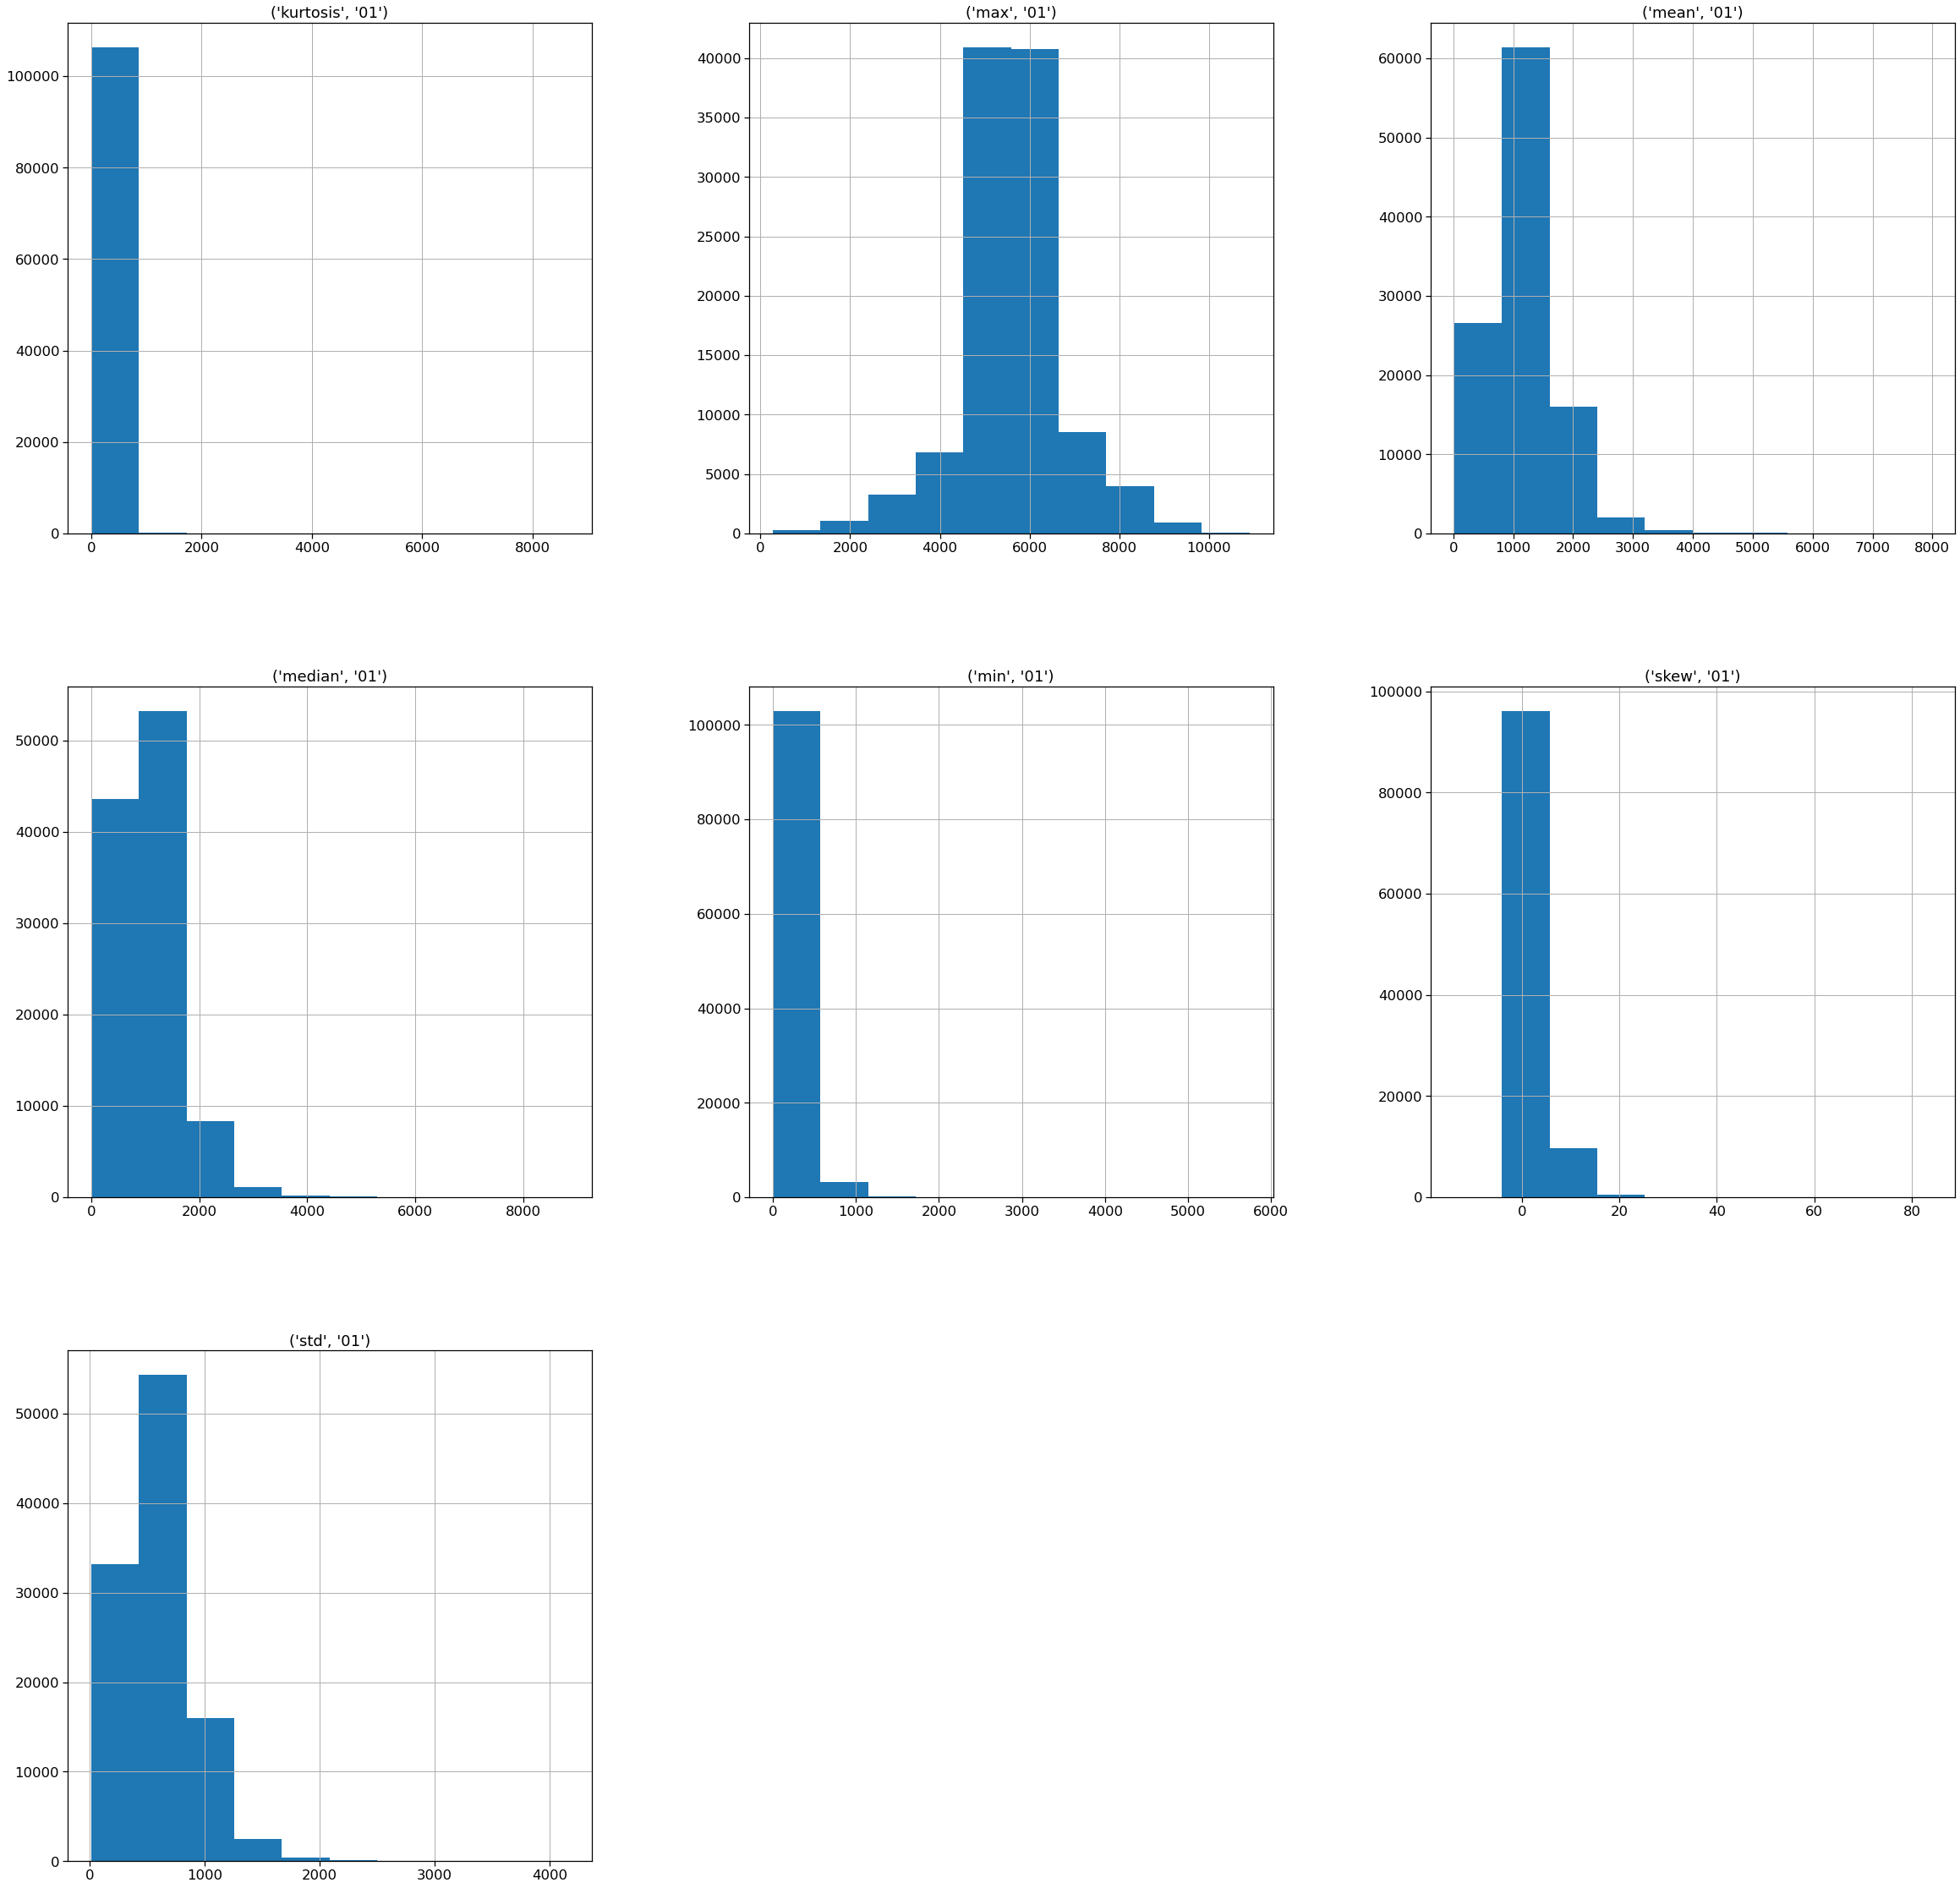

In [13]:
features['spectral_centroid'].hist(figsize=(40,40))

In [14]:
ipd.display(features['spectral_rolloff'].head().style.format('{:.2f}'))

statistics,kurtosis,max,mean,median,min,skew,std
number,01,01,01,01,01,01,01
track_id,,,,,,,
2,0.84,9410.01,3267.80,3143.85,0.00,0.35,1300.73
3,2.38,10002.17,3514.62,3413.01,0.00,1.12,1650.36
5,-0.24,9442.31,2773.93,2863.92,0.00,0.27,1323.47
10,3.62,10056.01,2603.49,2002.59,0.00,1.80,1524.40
20,-0.74,9496.14,4201.35,4166.67,75.37,0.16,1495.30


In [15]:
ipd.display(features['spectral_centroid'].head().style.format('{:.2f}'))

statistics,kurtosis,max,mean,median,min,skew,std
number,01,01,01,01,01,01,01
track_id,,,,,,,
2,2.41,5514.05,1639.58,1503.50,0.00,1.08,719.77
3,3.52,6288.43,1763.01,1517.99,0.00,1.65,972.76
5,1.32,5648.61,1292.96,1186.51,0.00,0.94,665.32
10,9.73,5739.39,1360.03,1180.97,0.00,2.52,668.70
20,2.18,5540.21,1732.97,1640.78,123.61,0.96,481.93


In [16]:
df_target=features[['spectral_rolloff','spectral_centroid']] #,,'spectral_bandwidth']]

In [17]:
df_target=df_target.droplevel(0,axis=1)

In [18]:
df_target.columns=['roll_kurtosis','roll_max','roll_mean','roll_median','roll_min','roll_skew','roll_std',
                   'centr_kurtosis','centr_max','centr_mean','centr_median','centr_min','centr_skew','centr_std']
df_target.head()

,roll_kurtosis,roll_max,roll_mean,roll_median,roll_min,roll_skew,roll_std,centr_kurtosis,centr_max,centr_mean,centr_median,centr_min,centr_skew,centr_std
track_id,,,,,,,,,,,,,,
2,0.840540,9410.009766,3267.804688,3143.847656,0.000000,0.347372,1300.729736,2.406808,5514.049805,1639.583252,1503.496704,0.000000,1.079815,719.770508
3,2.379145,10002.172852,3514.619629,3413.012695,0.000000,1.118952,1650.357788,3.519866,6288.426758,1763.012451,1517.993652,0.000000,1.652693,972.758423
5,-0.238572,9442.309570,2773.931885,2863.916016,0.000000,0.266975,1323.465210,1.322586,5648.614746,1292.958130,1186.514038,0.000000,0.937101,665.319275
10,3.619834,10056.005859,2603.491943,2002.587891,0.000000,1.800220,1524.401245,9.729688,5739.394531,1360.028687,1180.966797,0.000000,2.523783,668.700806
20,-0.744805,9496.142578,4201.346191,4166.674805,75.366211,0.160345,1495.297119,2.177669,5540.209961,1732.971802,1640.781128,123.611168,0.960959,481.929871


# CREATING THE DATASET...

In [19]:
df=pd.merge(tracks,df_target, on='track_id')

In [20]:
df.shape

(106574, 17)

In [21]:
df.drop(index=df[df.subset=='large'].index, inplace=True)

In [22]:
print(df.shape)
df.sort_values('genre_top', ascending=True).head(5)

(25000, 17)


,split,subset,genre_top,roll_kurtosis,roll_max,roll_mean,roll_median,roll_min,roll_skew,roll_std,centr_kurtosis,centr_max,centr_mean,centr_median,centr_min,centr_skew,centr_std
track_id,,,,,,,,,,,,,,,,,
4536,training,medium,Blues,-0.948332,9162.377930,3237.944092,3251.513672,129.199219,0.058573,1676.661743,0.129029,5098.355957,1528.196289,1418.592163,190.353348,0.720792,734.881409
1048,test,medium,Blues,36.081661,10626.635742,880.736450,656.762695,64.599609,5.917320,1410.000977,53.585682,8609.937500,537.908691,374.414490,140.557312,7.219820,976.406311
93398,training,medium,Blues,2.042341,9377.709961,2151.318359,1916.455078,150.732422,1.120726,1025.148315,4.622946,5512.211426,1055.743896,969.792847,116.444351,1.520145,485.082611
16024,training,medium,Blues,2.596545,9474.609375,2545.360596,2627.050781,0.000000,0.365053,910.441895,4.084910,5681.602051,1274.536499,1232.045166,0.000000,0.878308,446.093445
16023,training,medium,Blues,1.831362,9679.174805,2348.405273,2293.286133,193.798828,0.721274,1246.395142,18.008766,5845.033203,1007.777100,942.953674,202.759750,2.583945,507.381866


In [23]:
df.groupby(['genre_top'])['centr_std'].mean().sort_values(ascending=False)

genre_top
Soul-RnB               835.493886
Hip-Hop                764.545166
Electronic             762.608757
Spoken                 748.444868
Blues                  613.367164
Pop                    597.679282
Experimental           590.216988
Jazz                   581.527534
Easy Listening         579.678142
Country                568.052810
International          555.704850
Instrumental           516.866092
Folk                   515.616682
Rock                   480.004325
Classical              434.754246
Old-Time / Historic    220.075925
Name: centr_std, dtype: float64

Text(0, 0.5, '')

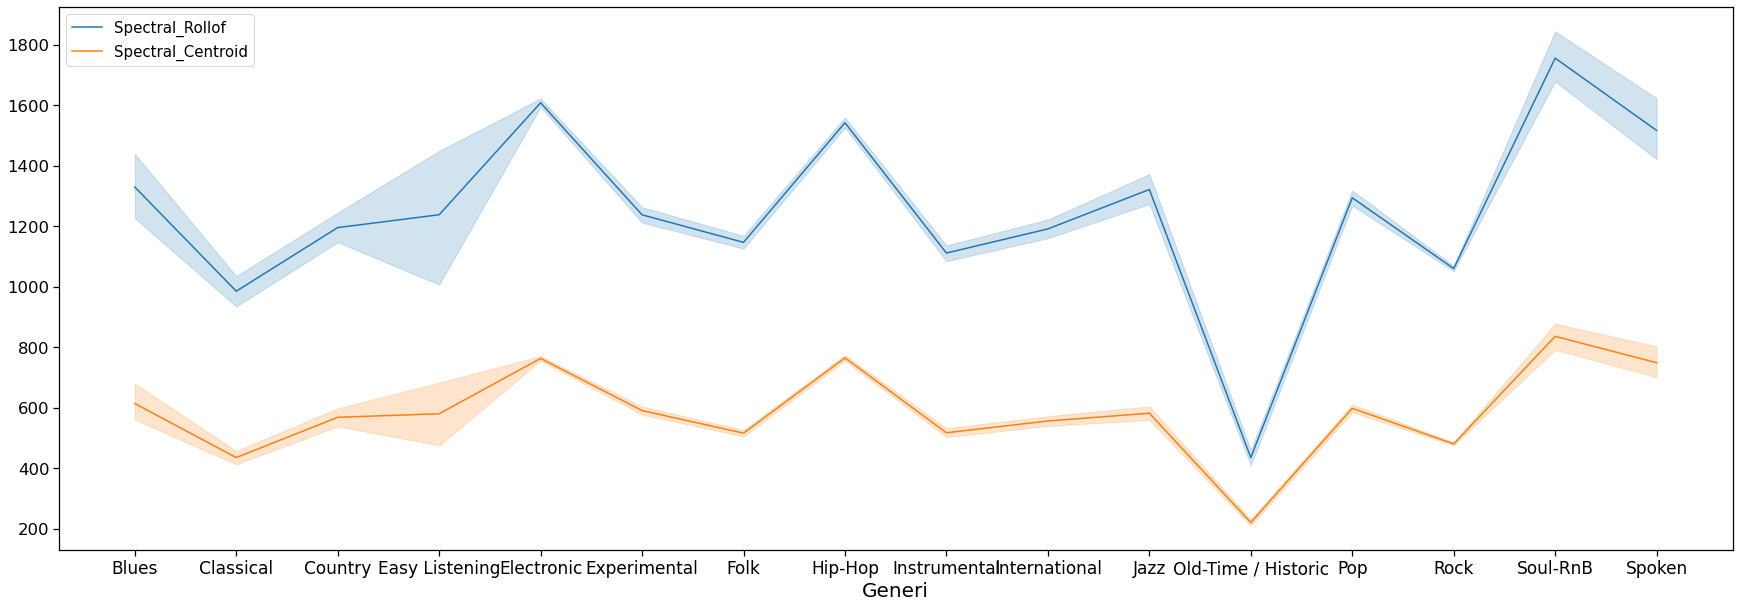

In [24]:
fig, ax = plt.subplots(figsize=(30, 10))
roll=sns.lineplot(x='genre_top',y='roll_std', data=df, palette='r', label='Spectral_Rolloff')
centr=sns.lineplot(x='genre_top', y='centr_std', data=df, label='Spectral Centroid')
#sns.lineplot(x='roll_std', y='centr_std',hue='genre_top', data=df_enc)
plt.legend(['Spectral_Rollof', 'Spectral_Centroid'],fontsize = 15) 
plt.xticks(fontsize=17)
plt.xlabel('Generi', fontsize=20)
plt.ylabel('', fontsize=1)


In [26]:
from collections import Counter

In [27]:
blues=df[df.genre_top == 'Blues'].count()
Counter(blues)

Counter({74: 17})

In [28]:
df

,split,subset,genre_top,roll_kurtosis,roll_max,roll_mean,roll_median,roll_min,roll_skew,roll_std,centr_kurtosis,centr_max,centr_mean,centr_median,centr_min,centr_skew,centr_std
track_id,,,,,,,,,,,,,,,,,
2,training,small,Hip-Hop,0.840540,9410.009766,3267.804688,3143.847656,0.000000,0.347372,1300.729736,2.406808,5514.049805,1639.583252,1503.496704,0.000000,1.079815,719.770508
3,training,medium,Hip-Hop,2.379145,10002.172852,3514.619629,3413.012695,0.000000,1.118952,1650.357788,3.519866,6288.426758,1763.012451,1517.993652,0.000000,1.652693,972.758423
5,training,small,Hip-Hop,-0.238572,9442.309570,2773.931885,2863.916016,0.000000,0.266975,1323.465210,1.322586,5648.614746,1292.958130,1186.514038,0.000000,0.937101,665.319275
10,training,small,Pop,3.619834,10056.005859,2603.491943,2002.587891,0.000000,1.800220,1524.401245,9.729688,5739.394531,1360.028687,1180.966797,0.000000,2.523783,668.700806
134,training,medium,Hip-Hop,0.488314,9442.309570,2462.616943,2099.487305,0.000000,0.750207,1406.506592,2.208298,5518.117188,1257.696289,1118.902588,0.000000,1.120293,718.104797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155297,training,medium,Instrumental,32.431602,9883.740234,1189.471436,1033.593750,204.565430,5.377576,1276.645996,55.303261,8601.571289,750.424744,636.640259,220.715759,7.249722,919.452454
155298,training,medium,Folk,7.010324,9991.406250,1504.343750,1313.525391,0.000000,2.150454,1135.410767,18.339352,6361.462402,770.230652,676.175720,0.000000,3.141982,449.027496
155306,training,medium,Folk,7.370663,9453.076172,1562.254517,1238.159180,193.798828,2.179922,1146.488037,10.664659,5597.755859,780.710510,650.279541,193.229736,2.397812,472.045807


In [29]:
old_time=df[df.genre_top == 'Old-Time / Historic'].count()
Counter(old_time)

Counter({510: 17})

In [30]:
exp=df[df.genre_top == 'Classical'].count()
Counter(exp)

Counter({619: 17})

# Pre-processing

In [31]:
train = df.index[df['split'] == 'training']
val = df.index[df['split'] == 'validation']
test = df.index[df['split'] == 'test']

print('{} training examples, {} validation examples, {} testing examples'.format(*map(len, [train, val, test])))

genres = list(LabelEncoder().fit(df['genre_top']).classes_)
genres = list(df['genre_top'].unique())

19922 training examples, 2505 validation examples, 2573 testing examples


## Data Encoding

In [32]:
#copy dataframe
df_enc=df.copy()

In [33]:
df_enc.columns

Index(['split', 'subset', 'genre_top', 'roll_kurtosis', 'roll_max',
       'roll_mean', 'roll_median', 'roll_min', 'roll_skew', 'roll_std',
       'centr_kurtosis', 'centr_max', 'centr_mean', 'centr_median',
       'centr_min', 'centr_skew', 'centr_std'],
      dtype='object')

In [34]:
df_enc.head(2)

,split,subset,genre_top,roll_kurtosis,roll_max,roll_mean,roll_median,roll_min,roll_skew,roll_std,centr_kurtosis,centr_max,centr_mean,centr_median,centr_min,centr_skew,centr_std
track_id,,,,,,,,,,,,,,,,,
2,training,small,Hip-Hop,0.840540,9410.009766,3267.804688,3143.847656,0.0,0.347372,1300.729736,2.406808,5514.049805,1639.583252,1503.496704,0.0,1.079815,719.770508
3,training,medium,Hip-Hop,2.379145,10002.172852,3514.619629,3413.012695,0.0,1.118952,1650.357788,3.519866,6288.426758,1763.012451,1517.993652,0.0,1.652693,972.758423


In [35]:
#function for encoding categorical variables
le=LabelEncoder()
df_enc['genre_top']=le.fit_transform(df_enc['genre_top'])

In [36]:
df_enc['genre_top'].unique()

array([ 7, 12, 13,  6,  5, 10,  4,  9, 14,  0, 15,  2,  1, 11,  8,  3])

In [37]:
replace_values=[ 7, 12, 13,  6,  5, 10,  4,  9, 14,  0, 15,  2,  1,  8,  3]
df_enc['genre_top']=df_enc['genre_top'].replace(replace_values,0)
df_enc['genre_top']=df_enc['genre_top'].replace(11,1)

In [38]:
df_enc['genre_top']

track_id
2         0
3         0
5         0
10        0
134       0
         ..
155297    0
155298    0
155306    0
155307    0
155314    0
Name: genre_top, Length: 25000, dtype: int64

In [39]:
df_enc.groupby(['genre_top'])['roll_kurtosis'].max().sort_values(ascending=False)

genre_top
0    2676.883301
1    2123.129639
Name: roll_kurtosis, dtype: float64

<AxesSubplot:xlabel='genre_top', ylabel='count'>

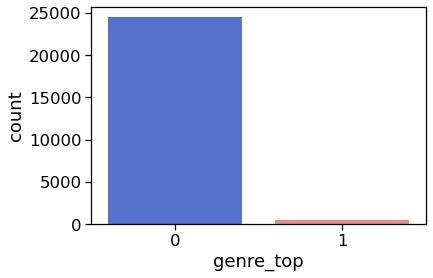

In [40]:
sns.countplot(df_enc.genre_top, palette={0:'royalblue',1:'lightcoral'})

In [41]:
y_train = df_enc['genre_top'].loc[df_enc['split'] == 'training']
y_val = df_enc['genre_top'].loc[df_enc['split'] == 'validation']
y_test = df_enc['genre_top'].loc[df_enc['split'] == 'test']
y_train.shape, y_val.shape, y_test.shape

((19922,), (2505,), (2573,))

In [42]:
X=df_enc.drop('genre_top',axis=1)

In [43]:
X_train = X.loc[X['split'] == 'training']
X_val = X.loc[X['split'] == 'validation']
X_test = X.loc[X['split'] == 'test']
X_train.shape, X_val.shape, X_test.shape

((19922, 16), (2505, 16), (2573, 16))

In [44]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [45]:
cut_columns=['split','subset',]#'genres_all'
X_train.drop(cut_columns,axis=1,inplace=True)
X_val.drop(cut_columns,axis=1,inplace=True)
X_test.drop(cut_columns,axis=1,inplace=True)


In [46]:
X_train.shape

(19922, 14)

# OUTLIER DETECTION

In [47]:
#task:rimuovere l'1% degli outliers:
outlier_fraction = 0.1
#andremo a cercare slamente l'1% degli outliers e li rimuoveremo o sostituiremo in seguito

In [48]:
from pyod.models.abod import ABOD
from pyod.models.lof import LOF

In [49]:
abod=ABOD(contamination=outlier_fraction)
abod.fit(X_train)

ABOD(contamination=0.1, method='fast', n_neighbors=5)

In [50]:
abod_anomalies = abod.predict(X_train)
np.unique(abod_anomalies, return_counts=True)

(array([0, 1]), array([17666,  2256], dtype=int64))

In [51]:
# select all rows that are not outliers
abod_inlier= abod_anomalies!=1
abod_outliers= X_train[abod_anomalies==1]
X_train.shape

(19922, 14)

In [52]:
# select all rows that are not outliers
abod_inlier= abod_anomalies!=1
abod_outlier= X_train[abod_anomalies==1]
X_train1, y_train1 = X_train.iloc[abod_inlier, :], y_train.iloc[abod_inlier]
# summarize the shape of the updated training dataset
print(X_train1.shape, y_train1.shape)

(17666, 14) (17666,)


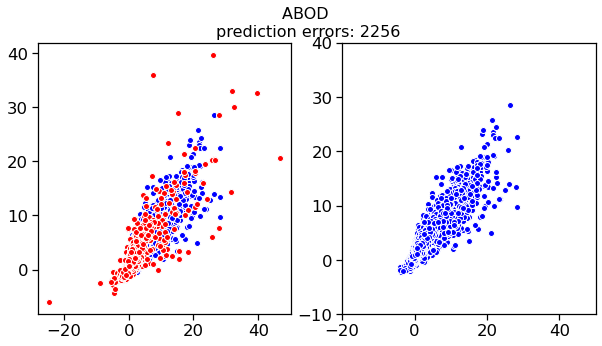

In [53]:
a=5
b=12
cmap=np.array(['white','red'])
fig, ax =plt.subplots(1,2,figsize=(10,5))
#ax[0].scatter(X_train.iloc[:,a], X_train.iloc[:,b], c='b',edgecolor='w')

ax[0].scatter(X_train.iloc[:,a], X_train.iloc[:,b], c='b',edgecolor='w')
ax[0].scatter(abod_outlier.iloc[:,a], abod_outlier.iloc[:,b], c='r', edgecolor='w')
#ax[0].set_xlabel("prediction errors: %d" % (len(abod_outlier)))

ax[1].scatter(X_train1.iloc[:,a], X_train1.iloc[:,b],c='b',edgecolor='w')
ax[1].set_ylim([-10.0,40.0])
ax[1].set_xlim([-20.0,50.0])

fig.suptitle('ABOD \n'
            'prediction errors: %d' % (len(abod_outlier)), fontsize=16)
plt.show()

## LOF

In [54]:
from sklearn.neighbors import LocalOutlierFactor

In [55]:
lof = LocalOutlierFactor( contamination=outlier_fraction)

In [56]:
lof_anomalies = lof.fit_predict(X_train)

In [57]:
np.unique(lof_anomalies, return_counts=True)

(array([-1,  1]), array([ 1993, 17929], dtype=int64))

In [58]:
lof_inlier=lof_anomalies!=-1
lof_outlier=X_train[lof_anomalies==-1]
X_train3, y_train3 = X_train.iloc[lof_inlier, :], y_train.iloc[lof_inlier]
# summarize the shape of the updated training dataset
print(X_train3.shape, y_train3.shape)

(17929, 14) (17929,)


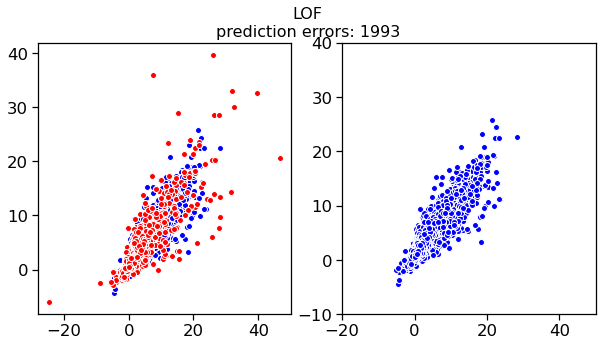

In [59]:
a=5
b=12
cmap=np.array(['white','red'])
fig, ax =plt.subplots(1,2,figsize=(10,5))
#ax[0].scatter(X_train.iloc[:,a], X_train.iloc[:,b], c='b',edgecolor='w')

ax[0].scatter(X_train.iloc[:,a], X_train.iloc[:,b], c='b',edgecolor='w')
ax[0].scatter(lof_outlier.iloc[:,a], lof_outlier.iloc[:,b], c='r', edgecolor='w')
#ax[0].set_xlabel("prediction errors: %d" % (len(lof_outlier)))

ax[1].scatter(X_train3.iloc[:,a], X_train3.iloc[:,b],c='b',edgecolor='w')
ax[1].set_ylim([-10.0,40.0])
ax[1].set_xlim([-20.0,50.0])

fig.suptitle('LOF\n'
             "prediction errors: %d" % (len(lof_outlier)), fontsize=16)
plt.show()

# Isolation Forest

In [60]:
from sklearn.ensemble import IsolationForest

In [61]:
iso = IsolationForest(max_samples=100,random_state=42, contamination=0.1) 
iso.fit(X_train)
if_anomalies=iso.predict(X_train)

In [62]:
np.unique(if_anomalies,return_counts=True)

(array([-1,  1]), array([ 1993, 17929], dtype=int64))

In [63]:
# select all rows that are not outliers
if_inlier=if_anomalies!=-1
if_outlier=X_train[if_anomalies==-1]
X_train4, y_train4 = X_train.iloc[if_inlier, :], y_train.iloc[if_inlier]
# summarize the shape of the updated training dataset
print(X_train4.shape, y_train4.shape)

(17929, 14) (17929,)


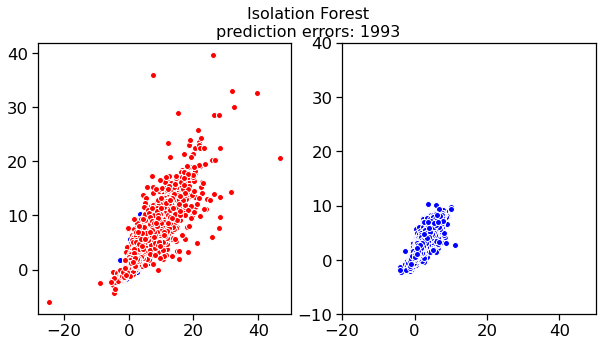

In [64]:
a=5
b=12
cmap=np.array(['white','red'])
fig, ax =plt.subplots(1,2,figsize=(10,5))
#ax[0].scatter(X_train.iloc[:,a], X_train.iloc[:,b], c='b',edgecolor='w')

ax[0].scatter(X_train.iloc[:,a], X_train.iloc[:,b], c='b',edgecolor='w')
ax[0].scatter(if_outlier.iloc[:,a], if_outlier.iloc[:,b], c='r', edgecolor='w')
#ax[10].set_xlabel("prediction errors: %d" % (len(if_outlier)))

ax[1].scatter(X_train4.iloc[:,a], X_train4.iloc[:,b],c='b',edgecolor='w')
ax[1].set_ylim([-10.0,40.0])
ax[1].set_xlim([-20.0,50.0])

fig.suptitle('Isolation Forest\n'
            'prediction errors: %d' % (len(if_outlier)), fontsize=16)
plt.show()

# COMPARISON

In [65]:
lof_indexes=lof_outlier.index.tolist()
if_indexes=if_outlier.index.tolist()
abod_indexes=abod_outlier.index.tolist()

In [66]:
#comparison lof with if
len(lof_indexes), len(if_indexes)

(1993, 1993)

In [67]:
count_lof_if=0
for i in set(lof_indexes).intersection(set(if_indexes)):
    count_lof_if= count_lof_if+1
print(count_lof_if)

460


In [68]:
#comparison lof with abod
len(lof_indexes), len(abod_indexes)

(1993, 2256)

In [69]:
count_lof_abod=0
for i in set(lof_indexes).intersection(set(abod_indexes)):
    count_lof_abod= count_lof_abod+1
print(count_lof_abod) 

845


In [70]:
#comparison if with abod
count_if_abod=0
for i in set(if_indexes).intersection(set(abod_indexes)):
    count_if_abod= count_if_abod+1
print(count_if_abod) 

743


In [71]:
#comparison among if, abod, lof
count_comp=0
for i in set(if_indexes).intersection(set(abod_indexes)).intersection(set(lof_indexes)):
        count_comp= count_comp+1
print(count_comp) 

316


In [72]:
X_train_clean=X_train.copy()
y_train_clean=y_train.copy()

In [73]:
for index in set(if_indexes).intersection(set(abod_indexes)):
    X_train_clean.drop(index,inplace=True)
    y_train_clean.drop(index, inplace=True)
print('Dataset before outliers removed:',X_train.shape, y_train.shape)
print('Dataset cleaned:', X_train_clean.shape, y_train_clean.shape)

Dataset before outliers removed: (19922, 14) (19922,)
Dataset cleaned: (19179, 14) (19179,)


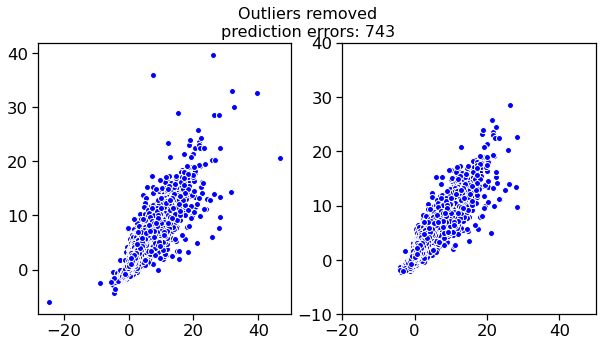

In [74]:
a=5
b=12
cmap=np.array(['white','red'])
fig, ax =plt.subplots(1,2,figsize=(10,5))
#ax[0].scatter(X_train.iloc[:,a], X_train.iloc[:,b], c='b',edgecolor='w')

ax[0].scatter(X_train.iloc[:,a], X_train.iloc[:,b], c='b',edgecolor='w')
#ax[0].scatter(if_outlier.iloc[:,a], if_outlier.iloc[:,b], c='r', edgecolor='w')
#ax[10].set_xlabel("prediction errors: %d" % (len(if_outlier)))

ax[1].scatter(X_train_clean.iloc[:,a], X_train_clean.iloc[:,b],c='b',edgecolor='w')
ax[1].set_ylim([-10.0,40.0])
ax[1].set_xlim([-20.0,50.0])

fig.suptitle('Outliers removed\n'
            'prediction errors: %d' % (len(X_train)-len(X_train_clean)), fontsize=16)
plt.show()

In [75]:
X_train=X_train_clean
y_train=y_train_clean
X_train.shape,y_train.shape

((19179, 14), (19179,))

# Decision Tree

In [76]:
from collections import Counter
from sklearn import tree
import pydotplus 
from IPython.display import Image  
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [72]:
print('I dataset sono così formati:')
print('X_train= {}, y_train= {}, sbilanciamento = {}'.format(X_train.shape,Counter(y_train),(371*100/19179)))
print('X_val= {}, y_val= {}, sbilanciamento = {}'.format(X_val.shape,Counter(y_val),(51*100/2505)))
print('X_test= {}, y_test= {}, sbilanciamento = {}'.format(X_test.shape,Counter(y_test),(51*100/2573)))

I dataset sono così formati:
X_train= (19179, 14), y_train= Counter({0: 18808, 1: 371}), sbilanciamento = 1.934407424787528
X_val= (2505, 14), y_val= Counter({0: 2454, 1: 51}), sbilanciamento = 2.035928143712575
X_test= (2573, 14), y_test= Counter({0: 2522, 1: 51}), sbilanciamento = 1.9821220365332297


In [78]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

### RandomSearch

In [74]:
dt=DecisionTreeClassifier(splitter='best',class_weight = 'balanced',random_state=42)

In [ ]:
param_list = {'criterion': ['gini','entropy'],
              'max_depth': list(np.arange(2,10)),
              'min_samples_split': [2,3,4,5,6,7,8,9,10],
              'min_samples_leaf': [2,3,4,5,6,7,8,9,10]}
random_search = RandomizedSearchCV(dt,cv = 3, param_distributions=param_list, n_iter=100)
random_search.fit(X_train, y_train)

In [76]:
print('3fold cross validation')
report(random_search.cv_results_, n_top=3)

3fold cross validation
Model with rank: 1
Mean validation score: 0.978 (std: 0.002)
Parameters: {'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 9, 'criterion': 'gini'}

Model with rank: 2
Mean validation score: 0.977 (std: 0.002)
Parameters: {'min_samples_split': 9, 'min_samples_leaf': 3, 'max_depth': 9, 'criterion': 'gini'}

Model with rank: 3
Mean validation score: 0.976 (std: 0.002)
Parameters: {'min_samples_split': 6, 'min_samples_leaf': 6, 'max_depth': 9, 'criterion': 'gini'}



In [77]:
param_list = {'criterion': ['gini','entropy'],
              'max_depth': list(np.arange(2,10)),
              'min_samples_split': [2,3,4,5,6,7,8,9,10],
              'min_samples_leaf': [2,3,4,5,6,7,8,9,10]}
random_search = RandomizedSearchCV(dt,cv = 5, param_distributions=param_list, n_iter=100)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10]})

In [78]:
print('5fold cross validation')
report(random_search.cv_results_, n_top=3)

5fold cross validation
Model with rank: 1
Mean validation score: 0.979 (std: 0.004)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 9, 'criterion': 'entropy'}

Model with rank: 2
Mean validation score: 0.978 (std: 0.004)
Parameters: {'min_samples_split': 9, 'min_samples_leaf': 2, 'max_depth': 9, 'criterion': 'entropy'}

Model with rank: 3
Mean validation score: 0.978 (std: 0.004)
Parameters: {'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 9, 'criterion': 'entropy'}



In [79]:
param_list = {'criterion': ['gini','entropy'],
              'max_depth': list(np.arange(2,10)),
              'min_samples_split': [2,3,4,5,6,7,8,9,10],
              'min_samples_leaf': [2,3,4,5,6,7,8,9,10]}
random_search = RandomizedSearchCV(dt,cv = 10, param_distributions=param_list, n_iter=100)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10]})

In [80]:
print('10fold cross validation')
report(random_search.cv_results_, n_top=3)

10fold cross validation
Model with rank: 1
Mean validation score: 0.978 (std: 0.009)
Parameters: {'min_samples_split': 8, 'min_samples_leaf': 10, 'max_depth': 4, 'criterion': 'entropy'}

Model with rank: 1
Mean validation score: 0.978 (std: 0.009)
Parameters: {'min_samples_split': 6, 'min_samples_leaf': 6, 'max_depth': 4, 'criterion': 'entropy'}

Model with rank: 1
Mean validation score: 0.978 (std: 0.009)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 7, 'max_depth': 4, 'criterion': 'entropy'}

Model with rank: 1
Mean validation score: 0.978 (std: 0.009)
Parameters: {'min_samples_split': 4, 'min_samples_leaf': 8, 'max_depth': 4, 'criterion': 'entropy'}



In [79]:
dt= DecisionTreeClassifier(criterion='entropy',class_weight='balanced',
                           min_samples_split=2, min_samples_leaf=3,max_depth=9)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=9, min_samples_leaf=3)

In [80]:
train_pred = dt.predict(X_train)
val_pred = dt.predict(X_val)

In [81]:
print('Accuracy validation %s' % accuracy_score(y_val, val_pred))

Accuracy validation 0.9620758483033932


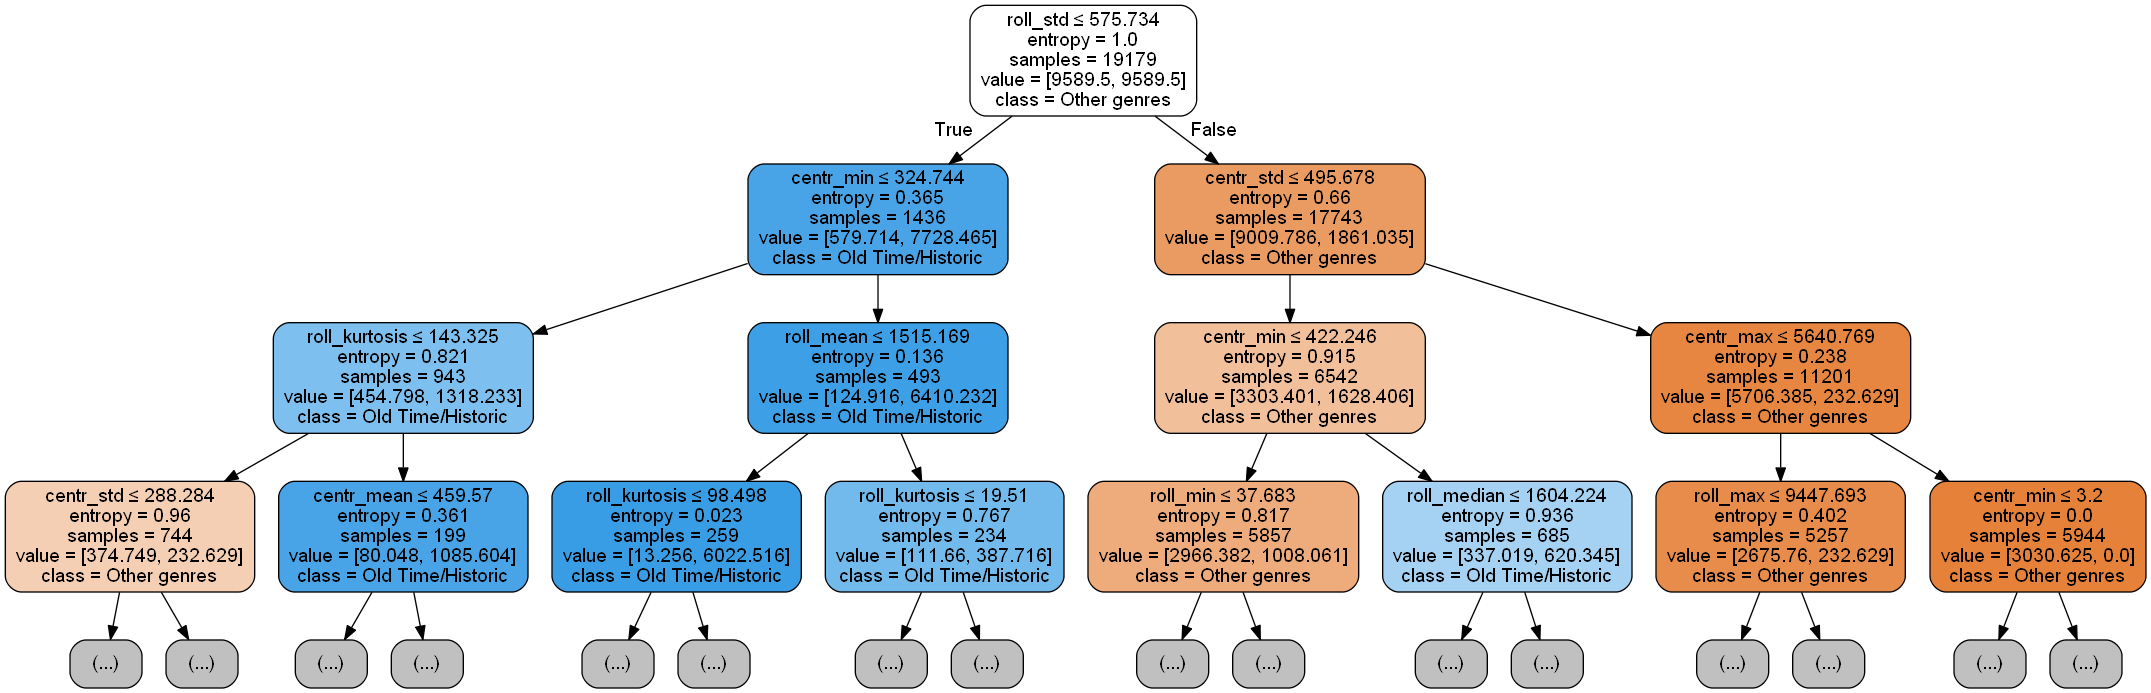

In [156]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=list(X_train.columns),  
                         class_names=['Old Time/Historic' if x == 1 else 'Other genres' for x in dt.classes_],  
                         filled=True, rounded=True,special_characters=True, max_depth=3)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [82]:
from sklearn.metrics import classification_report
clf_report = classification_report(y_val,val_pred,
                                   target_names=['Other genres', 'Old Time/Historic'],
                                   output_dict=True)

In [83]:
clf_report

{'Other genres': {'precision': 0.9957965531736024,
  'recall': 0.965362673186634,
  'f1-score': 0.9803434719635837,
  'support': 2454},
 'Old Time/Historic': {'precision': 0.3253968253968254,
  'recall': 0.803921568627451,
  'f1-score': 0.46327683615819215,
  'support': 51},
 'accuracy': 0.9620758483033932,
 'macro avg': {'precision': 0.6605966892852139,
  'recall': 0.8846421209070425,
  'f1-score': 0.7218101540608879,
  'support': 2505},
 'weighted avg': {'precision': 0.9821476964404225,
  'recall': 0.9620758483033932,
  'f1-score': 0.9698163668034738,
  'support': 2505}}

In [84]:
def report_scores(y_test, test_pred):
    print(classification_report(y_val, 
                            val_pred, 
                            target_names=['Other genres', 'Old Time music']))

report_scores(y_val, val_pred)

                precision    recall  f1-score   support

  Other genres       1.00      0.97      0.98      2454
Old Time music       0.33      0.80      0.46        51

      accuracy                           0.96      2505
     macro avg       0.66      0.88      0.72      2505
  weighted avg       0.98      0.96      0.97      2505



[[2369   85]
 [  10   41]]


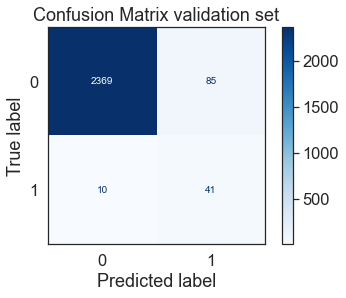

In [85]:
from sklearn.metrics import plot_confusion_matrix
sns.set_style('white')

disp = plot_confusion_matrix(dt,X_val,y_val,
                            cmap = plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix validation set')
print(disp.confusion_matrix)
plt.show()

In [86]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr_gs, tpr_gs, _ = roc_curve(y_val, val_pred)
roc_auc_gs = auc(fpr_gs, tpr_gs)
print(roc_auc_gs)

roc_auc_gs = roc_auc_score(y_val, val_pred, average=None)

0.8846421209070425


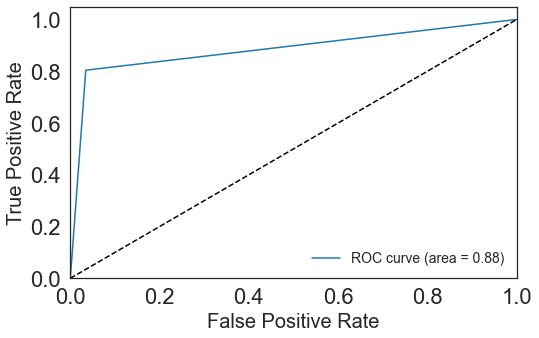

In [87]:
plt.figure(figsize=(8, 5))
plt.plot(fpr_gs, tpr_gs, label='ROC curve (area = %0.2f)' % (roc_auc_gs))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

### BLIND TEST

In [88]:
test_pred=dt.predict(X_test)

In [89]:
print('Accuracy test set ', accuracy_score(y_test, test_pred))

Accuracy test set  0.9650213758258842


In [90]:
from sklearn.metrics import classification_report
def report_scores(y_test, test_pred):
    print(classification_report(y_test, 
                            test_pred, 
                            target_names=['Other genres', 'Old Time music']))

report_scores(y_test, test_pred)

                precision    recall  f1-score   support

  Other genres       1.00      0.97      0.98      2522
Old Time music       0.34      0.84      0.49        51

      accuracy                           0.97      2573
     macro avg       0.67      0.91      0.74      2573
  weighted avg       0.98      0.97      0.97      2573



[[2440   82]
 [   8   43]]


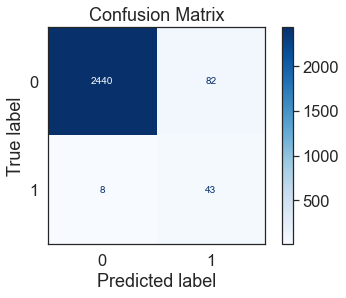

In [91]:
from sklearn.metrics import plot_confusion_matrix
sns.set_style('white')

disp = plot_confusion_matrix(dt,X_test,y_test,
                            cmap = plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
print(disp.confusion_matrix)
plt.show()

In [92]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr_dt, tpr_dt, _ = roc_curve(y_test, test_pred)
roc_auc_dt = auc(fpr_dt, tpr_dt)
print(roc_auc_dt)

0.9053116885136291


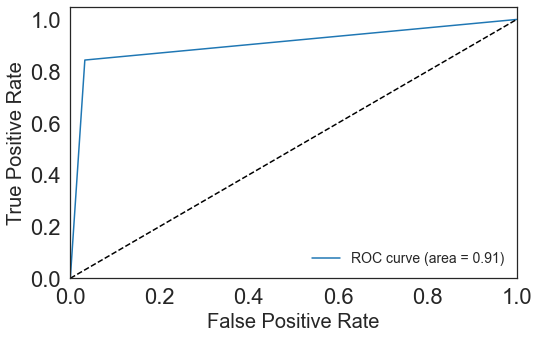

In [93]:
plt.figure(figsize=(8, 5))
plt.plot(fpr_dt, tpr_dt, label='ROC curve (area = %0.2f)' % (roc_auc_dt))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

# KNN

In [169]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
#normalize data with Robust scaler
scaler = RobustScaler()
scaler.fit_transform(X_train)
scaler.fit_transform(X_val)
scaler.fit_transform(X_test)

array([[ 1.39836398, -0.4047619 ,  0.12139229, ..., -0.48737327,
         0.42965552, -0.36366488],
       [ 0.03145794, -1.        , -0.30757461, ...,  0.3435532 ,
        -0.32662998, -0.80959978],
       [ 0.47839267,  1.33333333, -0.38022626, ..., -0.48737327,
         0.85467611,  0.47919876],
       ...,
       [-0.26400148,  0.66666667,  0.75783894, ...,  0.03345448,
        -0.0669875 ,  2.09023863],
       [ 0.98246302,  0.73809524, -0.52915618, ..., -0.2470687 ,
         1.59824388,  0.83670523],
       [-0.25908031,  0.66666667,  0.37986337, ...,  0.73607752,
         0.01492147,  2.75243267]])

In [170]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [171]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
grid_params= {'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
             'weights': ['uniform', 'distance'],
             'metric':['euclidean','manhattan']}
gs= GridSearchCV(KNeighborsClassifier(),
                grid_params,
                verbose=1,
                cv=5,
                n_jobs=-1)
gs_results=gs.fit(X_train,y_train)
gs_results.cv_results_.keys()

print(gs_results.best_score_,gs_results.best_params_)
report(gs_results.cv_results_, n_top=1)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
0.993482481887777 {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Model with rank: 1
Mean validation score: 0.993 (std: 0.000)
Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}



In [172]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
grid_params = {'n_neighbors': [11,12,13,14,15,16,17,18,19,20],
              'weights': ['uniform','distance'],
              'metric':['euclidean','manhattan']}
gs= GridSearchCV(KNeighborsClassifier(),
                 grid_params,
                verbose=1,
                cv=5,
                n_jobs=-1)
gs_results=gs.fit(X_train,y_train)
print(gs_results.best_score_,gs_results.best_params_)
report(gs_results.cv_results_, n_top=1)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
0.9929089134297596 {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Model with rank: 1
Mean validation score: 0.993 (std: 0.000)
Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}



### KNN VALIDATION

In [173]:
from sklearn.neighbors import KNeighborsClassifier 

In [182]:
knn= KNeighborsClassifier(n_neighbors=11, weights='distance',metric='manhattan',algorithm='ball_tree')
knn.fit(X_train,y_train)
y_pred=knn.predict(X_val)

result1= classification_report(y_val,y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_val,y_pred)
print("Accuracy:",result2)
result3=confusion_matrix(y_val,y_pred)
print(result3)               
    

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2454
           1       0.74      0.63      0.68        51

    accuracy                           0.99      2505
   macro avg       0.87      0.81      0.84      2505
weighted avg       0.99      0.99      0.99      2505

Accuracy: 0.9880239520958084
[[2443   11]
 [  19   32]]


[[2443   11]
 [  19   32]]


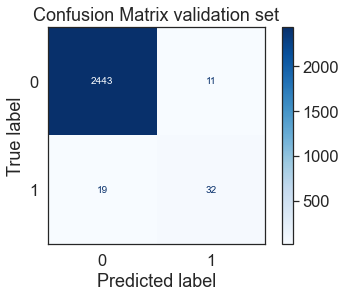

In [183]:
from sklearn.metrics import plot_confusion_matrix
sns.set_style('white')

disp = plot_confusion_matrix(knn,X_val,y_val,
                            cmap = plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix validation set')
print(disp.confusion_matrix)
plt.show()

In [184]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr,tpr,_=roc_curve(y_val,y_pred)
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.8114842514022723


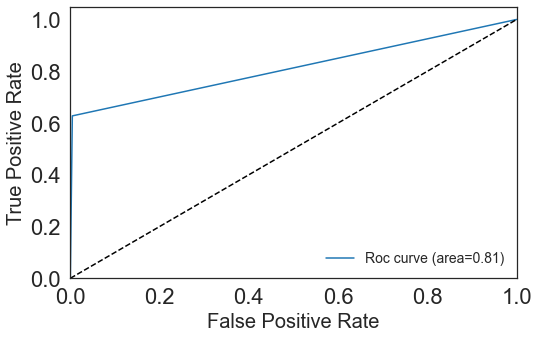

In [185]:
plt.figure(figsize=(8,5))
plt.plot(fpr,tpr,label='Roc curve (area=%0.2f)'%(roc_auc))

plt.plot([0,1],[0,1], 'k--' )
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.tick_params(axis='both',which='major',labelsize=22)
plt.legend(loc='lower right', fontsize=14, frameon=False)
plt.show()

### BLIND TEST

In [186]:
#knn = KNeighborsClassifier(n_neighbors=5,weights='uniform', algorithm='ball_tree', metric='manhattan')
knn.fit(X_train, y_train)
#prediction on the test set
y_pred = knn.predict(X_test)


In [187]:
print('Accuracy test set', accuracy_score(y_test, y_pred))

Accuracy test set 0.9922269724057521


In [188]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)
result3=confusion_matrix(y_test,y_pred)
print(result3)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2522
           1       0.80      0.80      0.80        51

    accuracy                           0.99      2573
   macro avg       0.90      0.90      0.90      2573
weighted avg       0.99      0.99      0.99      2573

Accuracy: 0.9922269724057521
[[2512   10]
 [  10   41]]


[[2512   10]
 [  10   41]]


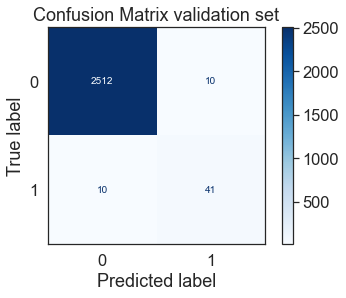

In [189]:
from sklearn.metrics import plot_confusion_matrix
sns.set_style('white')

disp = plot_confusion_matrix(knn,X_test,y_test,
                            cmap = plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix validation set')
print(disp.confusion_matrix)
plt.show()

In [190]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr_knn, tpr_knn, _ =roc_curve(y_test, y_pred)
roc_auc_knn=auc(fpr_knn,tpr_knn)
print(roc_auc_knn)

0.8999782307847802


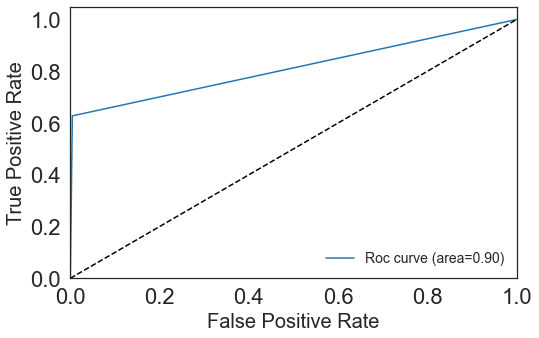

In [191]:
plt.figure(figsize=(8,5))
plt.plot(fpr,tpr,label='Roc curve (area=%0.2f)'%(roc_auc_knn))

plt.plot([0,1],[0,1], 'k--' )
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.tick_params(axis='both',which='major',labelsize=22)
plt.legend(loc='lower right', fontsize=14, frameon=False)
plt.show()

# IMBALANCED TASK

## UNDERSAMPLING

In [192]:
from imblearn.under_sampling import CondensedNearestNeighbour, RandomUnderSampler

## Random Undersampling

In [193]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 371, 1: 371})


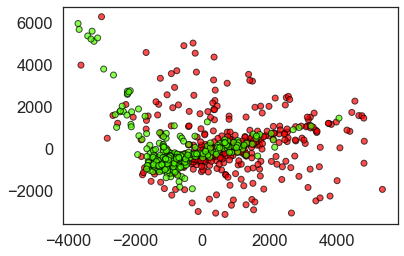

In [194]:
pca = PCA(n_components=2)
pca.fit(X_res)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Accuracy 0.8970073843762145
F1-score [0.9447341  0.24501425]
              precision    recall  f1-score   support

           0       1.00      0.90      0.94      2522
           1       0.14      0.84      0.25        51

    accuracy                           0.90      2573
   macro avg       0.57      0.87      0.59      2573
weighted avg       0.98      0.90      0.93      2573

[[2265  257]
 [   8   43]]


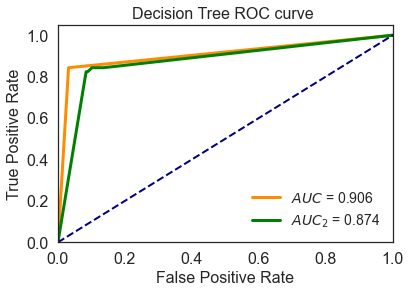

In [195]:
dt.fit(X_res, y_res)

y_pred = dt.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

y_score = dt.predict_proba(X_test)
fpr2, tpr2, _ = roc_curve(y_test, y_score[:, 1])
roc_auc2 = auc(fpr2, tpr2)

plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=3, label='$AUC$ = %.3f' % (roc_auc_dt))
plt.plot(fpr2, tpr2, color='green', lw=3, label='$AUC_2$ = %.3f' % (roc_auc2))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Decision Tree ROC curve ', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Accuracy 0.899339292654489
F1-score [0.9459854  0.26210826]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      2522
           1       0.15      0.90      0.26        51

    accuracy                           0.90      2573
   macro avg       0.58      0.90      0.60      2573
weighted avg       0.98      0.90      0.93      2573

[[2268  254]
 [   5   46]]


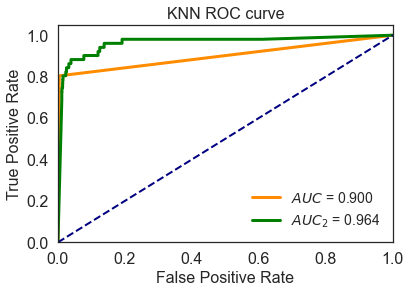

In [196]:
knn.fit(X_res, y_res)
y_pred = knn.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

y_score = knn.predict_proba(X_test)
fpr2, tpr2, _ = roc_curve(y_test, y_score[:, 1])
roc_auc2 = auc(fpr2, tpr2)

plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=3, label='$AUC$ = %.3f' % (roc_auc_knn))
plt.plot(fpr2, tpr2, color='green', lw=3, label='$AUC_2$ = %.3f' % (roc_auc2))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('KNN ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# CondensedNearestNeighbour

In [197]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)
X_res_cnn, y_res_cnn = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res_cnn))

Resampled dataset shape Counter({0: 585, 1: 371})


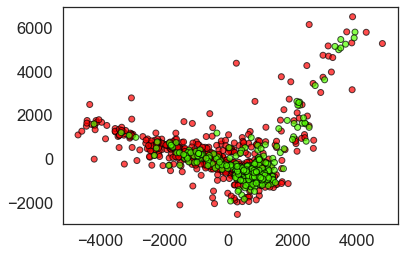

In [198]:
pca = PCA(n_components=2)
pca.fit(X_res_cnn)
X_pca = pca.transform(X_res_cnn)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res_cnn, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Accuracy 0.9152739992226973
F1-score [0.95492142 0.29677419]
              precision    recall  f1-score   support

           0       1.00      0.92      0.95      2522
           1       0.18      0.90      0.30        51

    accuracy                           0.92      2573
   macro avg       0.59      0.91      0.63      2573
weighted avg       0.98      0.92      0.94      2573

[[2309  213]
 [   5   46]]


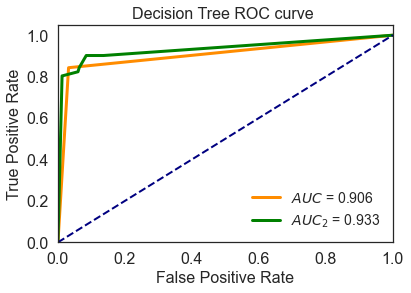

In [199]:
dt.fit(X_res_cnn, y_res_cnn)

dt_pred_cnn = dt.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, dt_pred_cnn))
print('F1-score %s' % f1_score(y_test, dt_pred_cnn, average=None))
print(classification_report(y_test, dt_pred_cnn))
print(confusion_matrix(y_test,dt_pred_cnn))

y_score_cnn = dt.predict_proba(X_test)
fpr2, tpr2, _ = roc_curve(y_test, y_score_cnn[:, 1])
roc_auc2 = auc(fpr2, tpr2)

plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=3, label='$AUC$ = %.3f' % (roc_auc_dt))
plt.plot(fpr2, tpr2, color='green', lw=3, label='$AUC_2$ = %.3f' % (roc_auc2))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Decision Tree ROC curve ', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Accuracy 0.9848425961912165
F1-score [0.99223572 0.68292683]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2522
           1       0.58      0.82      0.68        51

    accuracy                           0.98      2573
   macro avg       0.79      0.91      0.84      2573
weighted avg       0.99      0.98      0.99      2573

[[2492   30]
 [   9   42]]


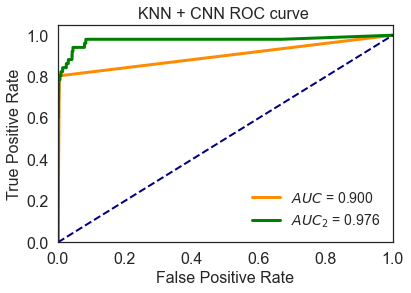

In [210]:
knn.fit(X_res_cnn, y_res_cnn)
knn_pred_cnn = knn.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, knn_pred_cnn))
print('F1-score %s' % f1_score(y_test, knn_pred_cnn, average=None))
print(classification_report(y_test, knn_pred_cnn))
print(confusion_matrix(y_test,knn_pred_cnn))

y_score_cnn = knn.predict_proba(X_test)
fpr2, tpr2, _ = roc_curve(y_test, y_score_cnn[:, 1])
roc_auc2 = auc(fpr2, tpr2)

plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=3, label='$AUC$ = %.3f' % (roc_auc_knn))
plt.plot(fpr2, tpr2, color='green', lw=3, label='$AUC_2$ = %.3f' % (roc_auc2))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('KNN + CNN ROC curve ', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# OVERSAMPLING

In [201]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

## Random Oversampling

In [211]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 18808, 1: 18808})


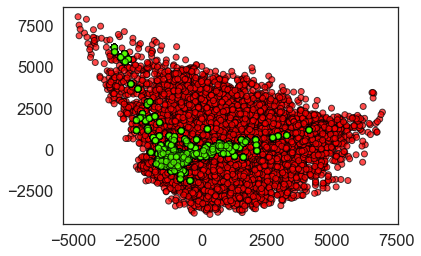

In [212]:
pca = PCA(n_components=2)
pca.fit(X_res)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Accuracy 0.9669646327244462
F1-score [0.98291457 0.50292398]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2522
           1       0.36      0.84      0.50        51

    accuracy                           0.97      2573
   macro avg       0.68      0.91      0.74      2573
weighted avg       0.98      0.97      0.97      2573

[[2445   77]
 [   8   43]]


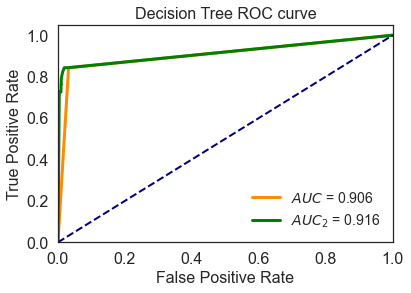

In [213]:
dt.fit(X_res, y_res)

y_pred = dt.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

y_score = dt.predict_proba(X_test)
fpr2, tpr2, _ = roc_curve(y_test, y_score[:, 1])
roc_auc2 = auc(fpr2, tpr2)

plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=3, label='$AUC$ = %.3f' % (roc_auc_dt))
plt.plot(fpr2, tpr2, color='green', lw=3, label='$AUC_2$ = %.3f' % (roc_auc2))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Decision Tree ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Accuracy 0.9654100272055965
F1-score [0.98207452 0.50828729]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2522
           1       0.35      0.90      0.51        51

    accuracy                           0.97      2573
   macro avg       0.68      0.93      0.75      2573
weighted avg       0.99      0.97      0.97      2573

[[2438   84]
 [   5   46]]


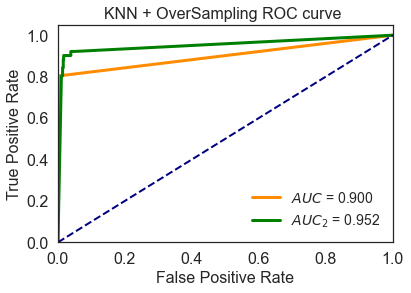

In [214]:
knn.fit(X_res, y_res)
y_pred = knn.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

y_score = knn.predict_proba(X_test)
fpr2, tpr2, _ = roc_curve(y_test, y_score[:, 1])
roc_auc2 = auc(fpr2, tpr2)

plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=3, label='$AUC$ = %.3f' % (roc_auc_knn))
plt.plot(fpr2, tpr2, color='green', lw=3, label='$AUC_2$ = %.3f' % (roc_auc2))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('KNN + OverSampling ROC curve ', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## SMOTE

In [206]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 18808, 1: 18808})


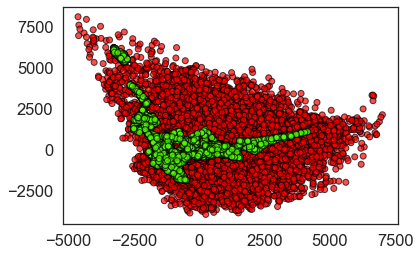

In [207]:
pca = PCA(n_components=2)
pca.fit(X_res)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Accuracy 0.9405363389040031
F1-score [0.96882005 0.35983264]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2522
           1       0.23      0.84      0.36        51

    accuracy                           0.94      2573
   macro avg       0.61      0.89      0.66      2573
weighted avg       0.98      0.94      0.96      2573

[[2377  145]
 [   8   43]]


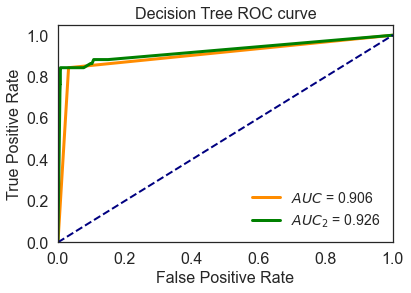

In [208]:
dt.fit(X_res, y_res)

y_pred = dt.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

y_score = dt.predict_proba(X_test)
fpr2, tpr2, _ = roc_curve(y_test, y_score[:, 1])
roc_auc2 = auc(fpr2, tpr2)

plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=3, label='$AUC$ = %.3f' % (roc_auc_dt))
plt.plot(fpr2, tpr2, color='green', lw=3, label='$AUC_2$ = %.3f' % (roc_auc2))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Decision Tree ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

Accuracy 0.952195880295375
F1-score [0.97504565 0.43317972]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      2522
           1       0.28      0.92      0.43        51

    accuracy                           0.95      2573
   macro avg       0.64      0.94      0.70      2573
weighted avg       0.98      0.95      0.96      2573

[[2403  119]
 [   4   47]]


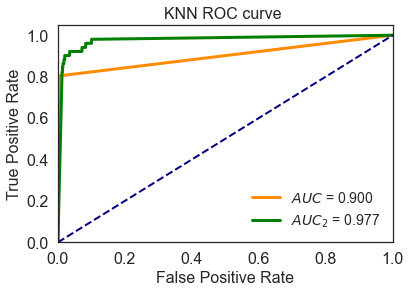

In [209]:
knn.fit(X_res, y_res)
y_pred = knn.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

y_score = knn.predict_proba(X_test)
fpr2, tpr2, _ = roc_curve(y_test, y_score[:, 1])
roc_auc2 = auc(fpr2, tpr2)

plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=3, label='$AUC$ = %.3f' % (roc_auc_knn))
plt.plot(fpr2, tpr2, color='green', lw=3, label='$AUC_2$ = %.3f' % (roc_auc2))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('KNN ROC curve ', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# RANDOM FOREST

In [96]:
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn import tree
import pydotplus 
from IPython.display import Image  
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [97]:
clf= RandomForestClassifier(n_estimators=100)

In [68]:
param_list = {'n_estimators' : [100,200,300,400,500],
              'criterion': ['gini','entropy'],
              'max_features': ['sqrt', 'log2'],
              'max_depth': list(np.arange(2,10)),
              'min_samples_split': [2,3,4,5,6,7,8,9,10],
              'min_samples_leaf': [2,3,4,5,6,7,8,9,10]}

random_search=RandomizedSearchCV(clf,param_distributions=param_list, n_iter=100, cv=5)
random_search.fit(X_train, y_train)
clf=random_search.best_estimator_

In [69]:
print('5fold cross validation')
report(random_search.cv_results_, n_top=3)

5fold cross validation
Model with rank: 1
Mean validation score: 0.932 (std: 0.003)
Parameters: {'n_estimators': 300, 'min_samples_split': 6, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 2, 'criterion': 'entropy'}

Model with rank: 2
Mean validation score: 0.931 (std: 0.003)
Parameters: {'n_estimators': 400, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': 2, 'criterion': 'entropy'}

Model with rank: 2
Mean validation score: 0.931 (std: 0.003)
Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 2, 'criterion': 'entropy'}



In [98]:
clf= RandomForestClassifier(n_estimators=300, criterion='entropy',min_samples_split=6,
                           min_samples_leaf=10, max_features='sqrt',max_depth=2,
                            class_weight='balanced_subsample',random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [99]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' %f1_score(y_test, y_pred, average=None))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy 0.9063350174893121
F1-score [0.94998962 0.26299694]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      2522
           1       0.16      0.84      0.26        51

    accuracy                           0.91      2573
   macro avg       0.58      0.88      0.61      2573
weighted avg       0.98      0.91      0.94      2573

[[2289  233]
 [   8   43]]


In [ ]:
nbr_features = 15

forest_importances = clf.feature_importances_
sorted_idx = forest_importances.argsort()[-nbr_features:]

tree_importances = dt.feature_importances_
sorted_idx = tree_featimportances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(list(X_train.columns))[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()x_ticks


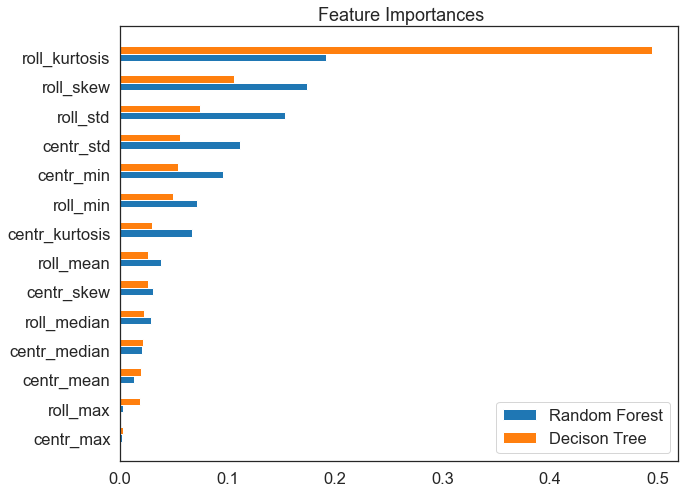

In [153]:
nbr_features = 15

forest_importances = clf.feature_importances_
sorted_idx1 = forest_importances.argsort() [-nbr_features:]

tree_importances = dt.feature_importances_
sorted_idx2 = tree_importances.argsort() [-nbr_features:]

barWidth = 0.25
fig = plt.subplots(figsize =(10, 8))
y_ticks1 = np.arange(0, len(sorted_idx1))
y_ticks2=[y+ barWidth for y in y_ticks1]

plt.barh(y_ticks1, forest_importances[sorted_idx1], height=barWidth,  label='Random Forest')
plt.barh(y_ticks2, tree_importances[sorted_idx2],height=barWidth,  label='Decision Tree' )

plt.yticks(y_ticks1, np.array(list(X_train.columns))[sorted_idx1])
#plt.yticks(y_ticks2, np.array(list(X_train.columns))[sorted_idx2])
plt.legend(['Random Forest','Decison Tree'])
plt.title(" Feature Importances")
plt.show()

In [101]:
from sklearn.inspection import permutation_importance

In [102]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

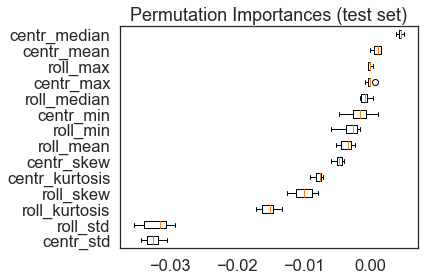

In [103]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(list(X_train.columns))[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

In [104]:
import pydotplus
from sklearn import tree
from IPython.display import Image

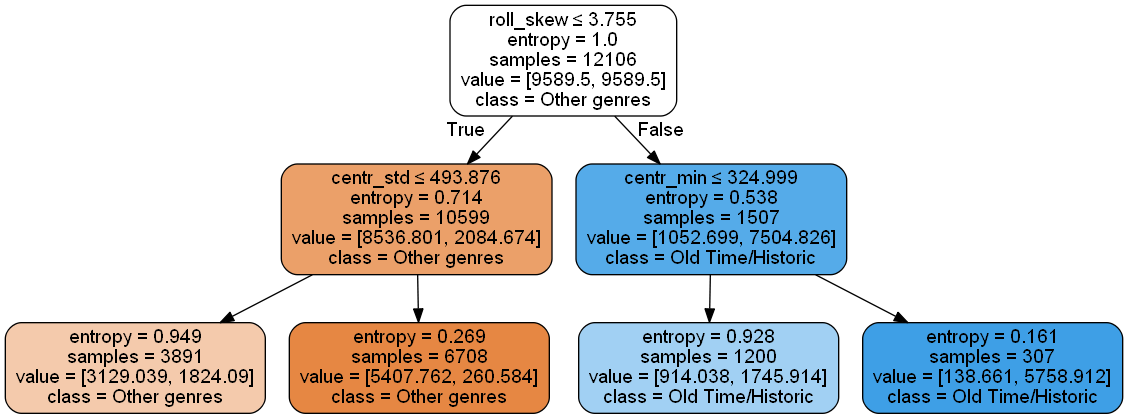

In [105]:
dot_data = tree.export_graphviz(clf.estimators_[1], out_file=None,  
                                feature_names=list(X_train.columns), 
                                class_names=['Old Time/Historic' if x == 1 else 'Other genres' for x in clf.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=3)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

[[2289  233]
 [   8   43]]


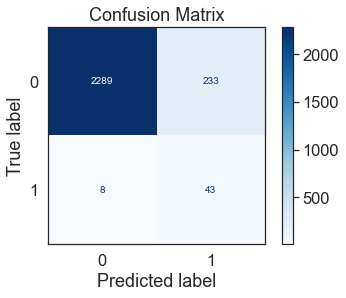

In [106]:
from sklearn.metrics import plot_confusion_matrix
sns.set_style('white')

disp = plot_confusion_matrix(clf, X_test,y_test,
                            cmap = plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
print(disp.confusion_matrix)
plt.show()

In [107]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8753751302265553


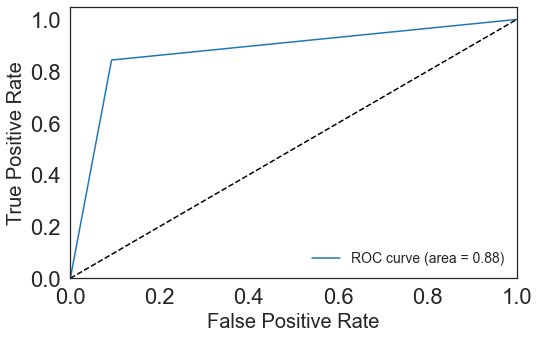

In [108]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

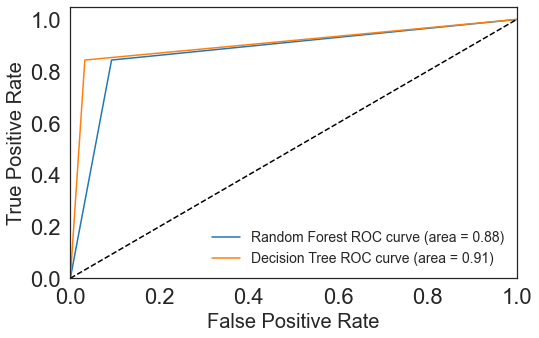

In [109]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='Random Forest ROC curve (area = %0.2f)' % (roc_auc))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree ROC curve (area = %0.2f)' % (roc_auc_dt))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

# Random Oversamling

In [110]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [111]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 18808, 1: 18808})


In [112]:
clf.fit(X_res, y_res)

y_pred_random = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_random))
print('F1-score %s' % f1_score(y_test, y_pred_random, average=None))
print(classification_report(y_test, y_pred_random))
print(confusion_matrix(y_test,y_pred_random))

Accuracy 0.897396035755927
F1-score [0.94495413 0.24571429]
              precision    recall  f1-score   support

           0       1.00      0.90      0.94      2522
           1       0.14      0.84      0.25        51

    accuracy                           0.90      2573
   macro avg       0.57      0.87      0.60      2573
weighted avg       0.98      0.90      0.93      2573

[[2266  256]
 [   8   43]]


# CondenseNearestNeighbour

In [113]:
from imblearn.under_sampling import CondensedNearestNeighbour

In [114]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)
X_res_cnn, y_res_cnn = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res_cnn))

Resampled dataset shape Counter({0: 585, 1: 371})


In [115]:
clf.fit(X_res_cnn, y_res_cnn)

dt_pred_cnn = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, dt_pred_cnn))
print('F1-score %s' % f1_score(y_test, dt_pred_cnn, average=None))
print(classification_report(y_test, dt_pred_cnn))
print(confusion_matrix(y_test,dt_pred_cnn))

Accuracy 0.9673532841041586
F1-score [0.9831393  0.48780488]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2522
           1       0.35      0.78      0.49        51

    accuracy                           0.97      2573
   macro avg       0.67      0.88      0.74      2573
weighted avg       0.98      0.97      0.97      2573

[[2449   73]
 [  11   40]]


In [116]:
fpr_random,tpr_random,_=roc_curve(y_test,y_pred_random)
roc_auc_random=auc(fpr_random,tpr_random)
print(roc_auc_random)

0.8708152571099812


In [117]:
fpr_cnn,tpr_cnn,_=roc_curve(y_test,dt_pred_cnn)
roc_auc_cnn=auc(fpr_cnn,tpr_cnn)
print(roc_auc_cnn)

0.8776842219837974


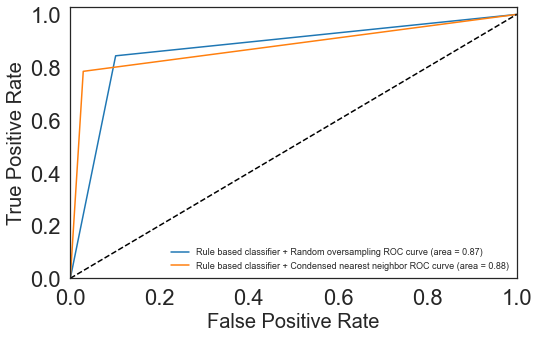

In [118]:
plt.figure(figsize=(8, 5))
plt.plot(fpr_random, tpr_random, label='Rule based classifier + Random oversampling ROC curve (area = %0.2f)' % (roc_auc_random))
plt.plot(fpr_cnn, tpr_cnn, label='Rule based classifier + Condensed nearest neighbor ROC curve (area = %0.2f)' % (roc_auc_cnn))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.03])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=9, frameon=False)
plt.show()